In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_excel("/content/Online Retail.xlsx")

In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [8]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [9]:
df = df.dropna(subset=['CustomerID'])

In [10]:
df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.fillna(method='ffill'))

<ipython-input-10-7d35064ba604>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.fillna(method='ffill'))


In [11]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [12]:
df = df.drop_duplicates()

In [13]:
df = df[df['Quantity'] > 0]

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.weekday
df['Hour'] = df['InvoiceDate'].dt.hour

In [15]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [16]:
df_daily = df.groupby('InvoiceDate')['Revenue'].sum().reset_index()
df_daily = df_daily.set_index('InvoiceDate').resample('D').sum()
df_daily.head()

,Revenue
InvoiceDate,
2010-12-01,46192.49
2010-12-02,47197.57
2010-12-03,23876.63
2010-12-04,0.00
2010-12-05,31361.28


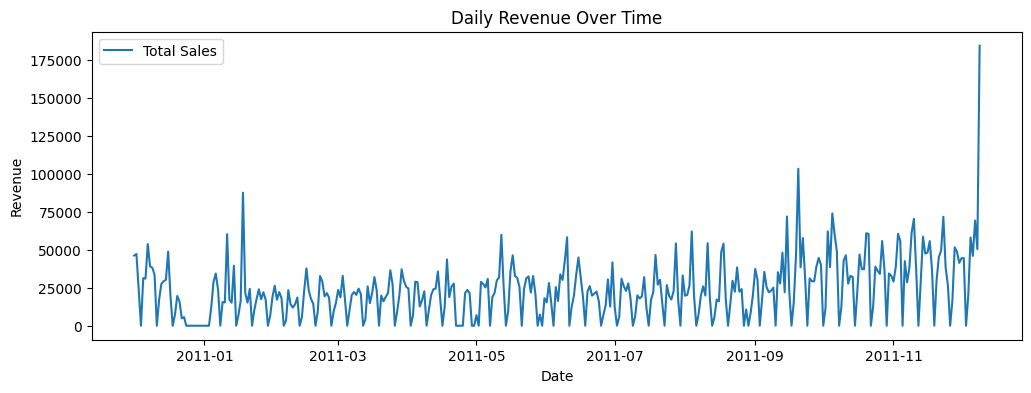

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(df_daily.index, df_daily['Revenue'], label="Total Sales")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Daily Revenue Over Time")
plt.legend()
plt.show()

<Axes: title={'center': 'Top 10 Best-Selling Products'}, xlabel='Description'>

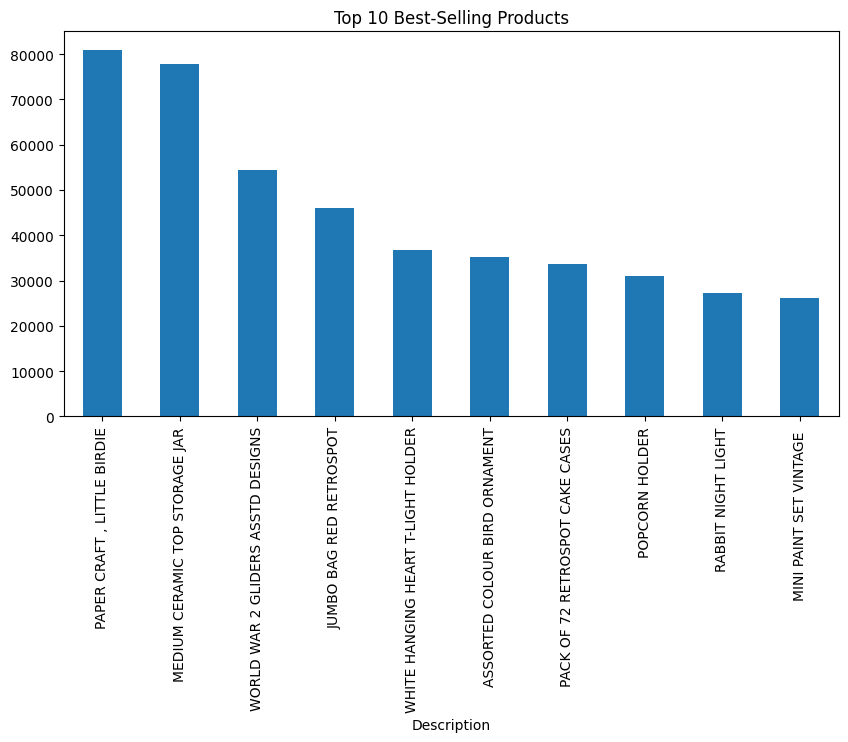

In [18]:
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="bar", figsize=(10,5), title="Top 10 Best-Selling Products")

In [19]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

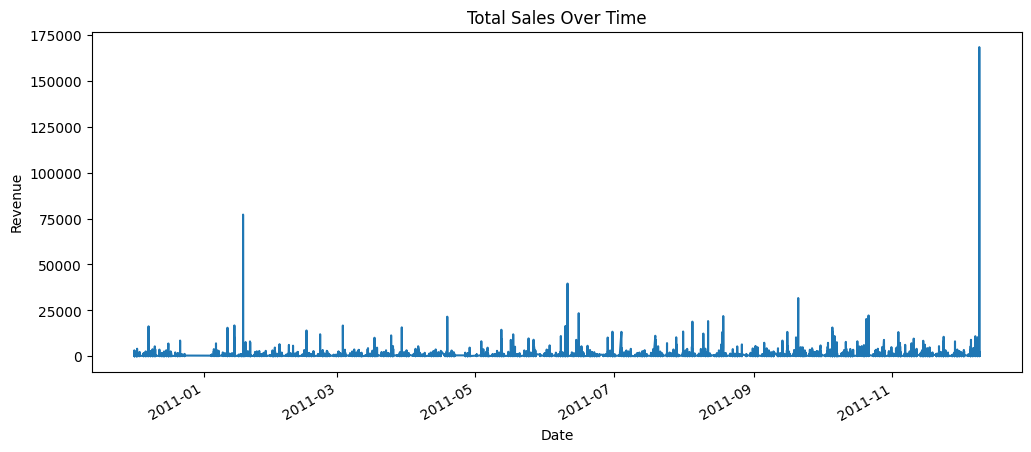

In [20]:
import matplotlib.pyplot as plt

df.groupby('InvoiceDate')['TotalPrice'].sum().plot(figsize=(12, 5), title="Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

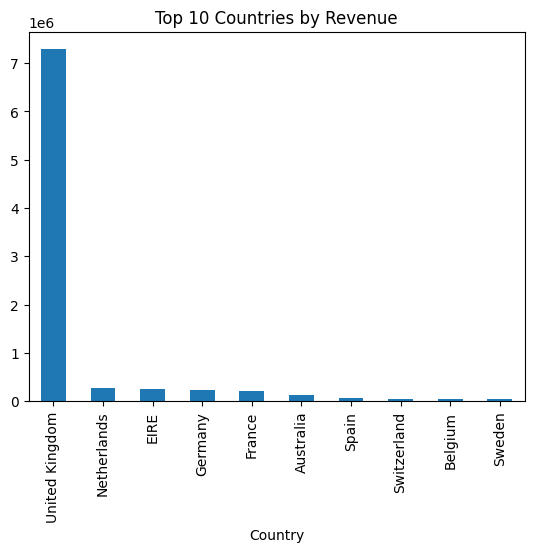

In [21]:
df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Countries by Revenue")
plt.show()

In [22]:
df['CustomerID'] = df['CustomerID'].astype('Int64')

In [23]:
Q1 = df['TotalPrice'].quantile(0.25)
Q3 = df['TotalPrice'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['TotalPrice'] >= (Q1 - 1.5 * IQR)) & (df['TotalPrice'] <= (Q3 + 1.5 * IQR))]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [25]:
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['StockCode'] = df['StockCode'].astype(str)
df['StockCode'] = le.fit_transform(df['StockCode'])

In [26]:
df['Lag_1'] = df['TotalPrice'].shift(1)
df['Lag_7'] = df['TotalPrice'].shift(7)
df['Lag_30'] = df['TotalPrice'].shift(30)

In [27]:
df.fillna(0, inplace=True)

In [29]:
features = ['Quantity', 'UnitPrice', 'Country', 'StockCode', 'Lag_1', 'Lag_7', 'Lag_30']
target = 'TotalPrice'

X = df[features]
y = df[target]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Year', 'Month', 'Day', 'Weekday',
       'Hour', 'Revenue', 'TotalPrice', 'Lag_1', 'Lag_7', 'Lag_30'],
      dtype='object')


In [35]:
df.columns = df.columns.str.strip()

In [36]:
print(df.dtypes)

InvoiceNo              object
StockCode               int64
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              Int64
Country                 int64
Year                    int32
Month                   int32
Day                     int32
Weekday                 int32
Hour                    int32
Revenue               float64
TotalPrice            float64
Lag_1                 float64
Lag_7                 float64
Lag_30                float64
dtype: object


In [37]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


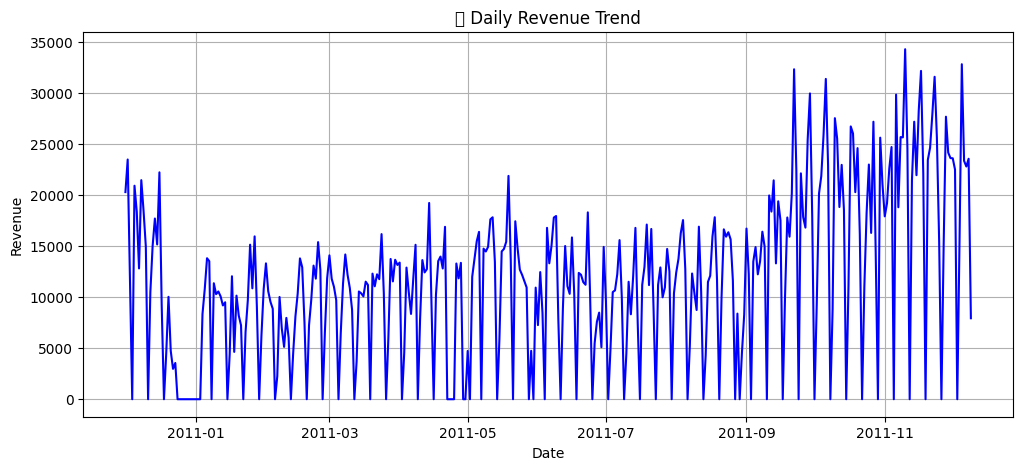

In [38]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert to datetime
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']  # Compute total price

daily_sales = df.resample('D', on='InvoiceDate').sum()['TotalPrice']  # Resample by day
plt.figure(figsize=(12, 5))
plt.plot(daily_sales, color='blue')
plt.title("📈 Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid()
plt.show()

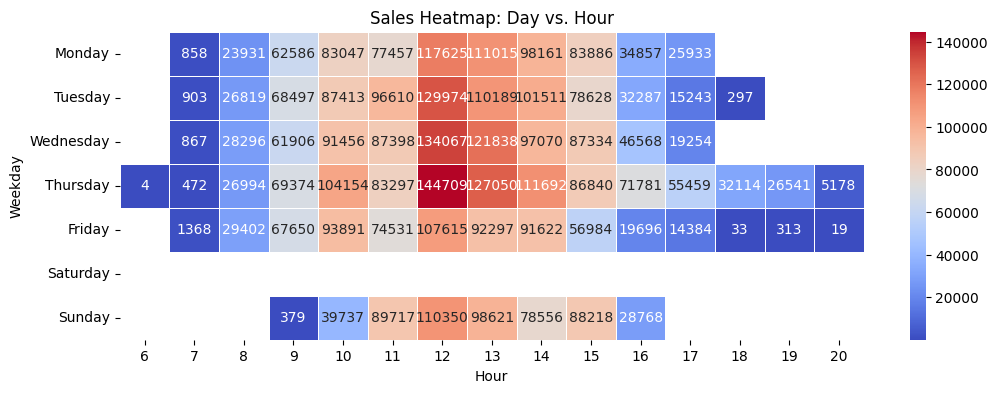

In [40]:
df['Hour'] = df['InvoiceDate'].dt.hour
df['Weekday'] = df['InvoiceDate'].dt.day_name()

heatmap_data = df.pivot_table(index='Weekday', columns='Hour', values='TotalPrice', aggfunc='sum')
heatmap_data = heatmap_data.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(12, 4))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)
plt.title("Sales Heatmap: Day vs. Hour")
plt.show()

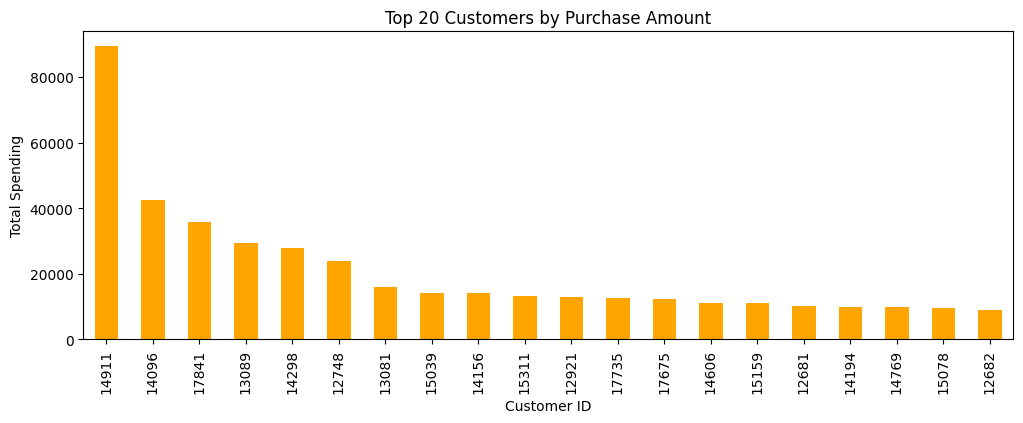

In [43]:
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)[:20]  # Top 20 customers

plt.figure(figsize=(12, 4))
top_customers.plot(kind='bar', color='orange')
plt.title("Top 20 Customers by Purchase Amount")
plt.xlabel("Customer ID")
plt.ylabel("Total Spending")
plt.show()

In [44]:
import plotly.express as px

df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month')['TotalPrice'].sum().reset_index()

fig = px.line(monthly_sales, x='Month', y='TotalPrice', markers=True, title="Monthly Sales Trend")
fig.show()

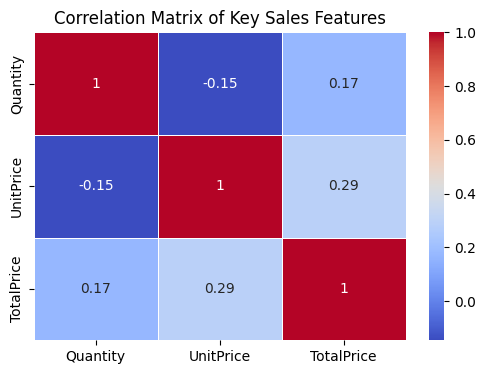

In [47]:
corr_matrix = df[['Quantity', 'UnitPrice', 'TotalPrice']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Key Sales Features")
plt.show()

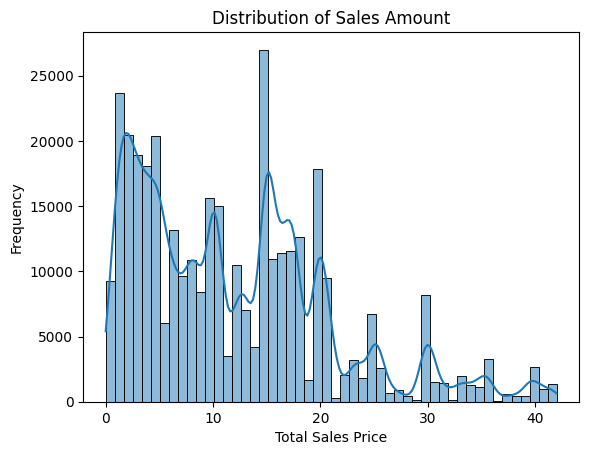

In [48]:
sns.histplot(df['TotalPrice'], bins=50, kde=True)
plt.title("Distribution of Sales Amount")
plt.xlabel("Total Sales Price")
plt.ylabel("Frequency")
plt.show()

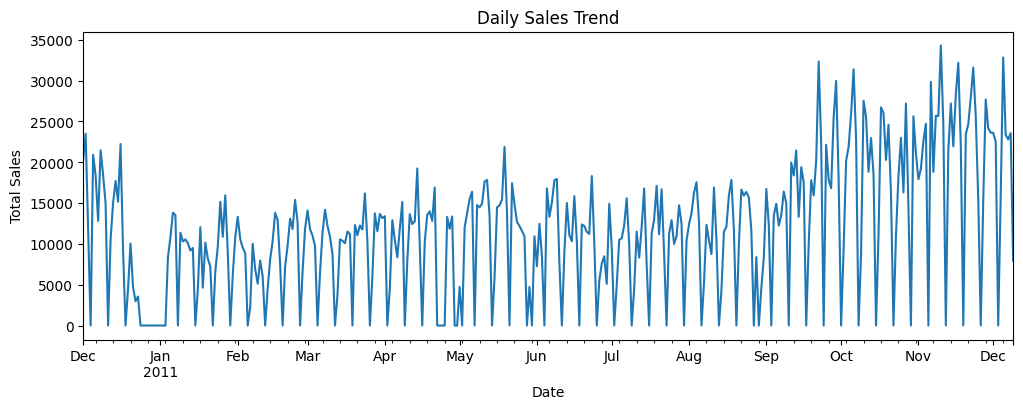

In [54]:
plt.figure(figsize=(12, 4))
daily_sales.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [62]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
customer_data = df.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'InvoiceNo': 'count',
    'Quantity': 'sum'
}).rename(columns={'InvoiceNo': 'Frequency'})

In [63]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data)

In [64]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

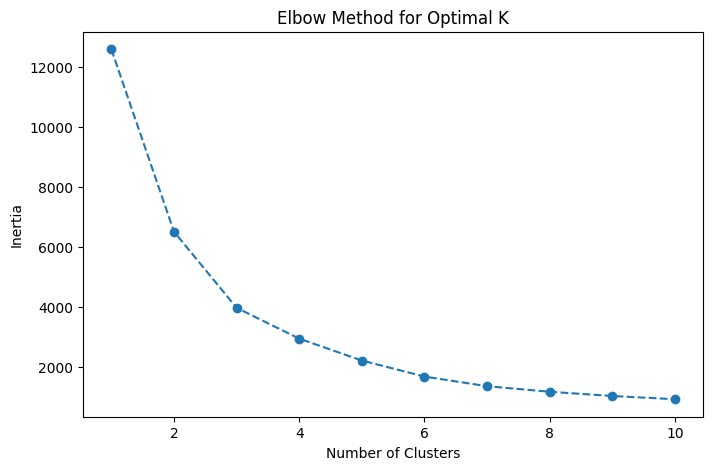

In [65]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [68]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

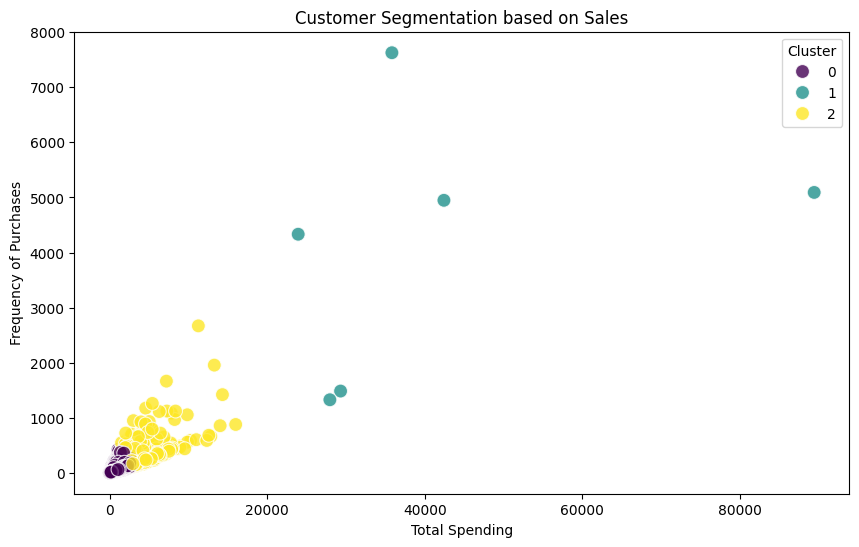

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='TotalPrice', y='Frequency', hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.xlabel('Total Spending')
plt.ylabel('Frequency of Purchases')
plt.title('Customer Segmentation based on Sales')
plt.legend(title='Cluster')
plt.show()

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [76]:
daily_sales = df.resample('D').sum()[['Quantity', 'TotalPrice']]

daily_sales['Lag_1'] = daily_sales['Quantity'].shift(1)
daily_sales['Lag_7'] = daily_sales['Quantity'].shift(7)
daily_sales['Lag_30'] = daily_sales['Quantity'].shift(30)

In [77]:
daily_sales.dropna(inplace=True)

daily_sales['Weekday'] = daily_sales.index.weekday
daily_sales['Month'] = daily_sales.index.month
daily_sales['Year'] = daily_sales.index.year

In [78]:
X = daily_sales[['Lag_1', 'Lag_7', 'Lag_30', 'Weekday', 'Month']]
y = daily_sales['Quantity']

In [79]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [80]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

In [81]:
print("Ridge Regression - MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("Ridge Regression - MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression - R2 Score:", r2_score(y_test, y_pred_ridge))

Ridge Regression - MAE: 2099.441468324313
Ridge Regression - MSE: 7845032.226074651
Ridge Regression - R2 Score: 0.72252568399256


In [82]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

In [83]:
print("Lasso Regression - MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("Lasso Regression - MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Regression - R2 Score:", r2_score(y_test, y_pred_lasso))

Lasso Regression - MAE: 2097.626669215494
Lasso Regression - MSE: 7842232.30243799
Lasso Regression - R2 Score: 0.7226247156948611


In [84]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [85]:
print("Random Forest - MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest - MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest - R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest - MAE: 2070.673188405797
Random Forest - MSE: 7526725.286697102
Random Forest - R2 Score: 0.7337840189157295


<ipython-input-87-b2eadca84a96>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




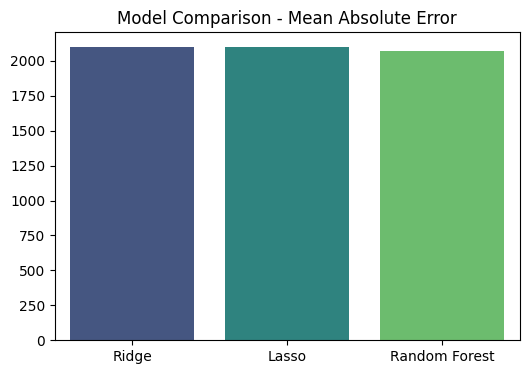

In [87]:
models = ['Ridge', 'Lasso', 'Random Forest']
mae_scores = [mean_absolute_error(y_test, y_pred_ridge), mean_absolute_error(y_test, y_pred_lasso), mean_absolute_error(y_test, y_pred_rf)]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=mae_scores, palette='viridis')
plt.title("Model Comparison - Mean Absolute Error")
plt.show()

In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [91]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(daily_sales)

In [89]:
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, :])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

In [92]:
time_steps = 10
X, y = create_sequences(scaled_data, time_steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [94]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0708 - val_loss: 0.0510
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0467 - val_loss: 0.0362
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0460 - val_loss: 0.0452
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0374 - val_loss: 0.0351
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0479 - val_loss: 0.0392
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0440 - val_loss: 0.0344
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0427 - val_loss: 0.0402
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0397 - val_loss: 0.0363
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0361 - val_loss: 0.0376
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0387 - val_loss: 0.0331
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0376 - val_loss: 0.0336
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0355 - val_loss: 0.0370
E

In [95]:
y_pred = model.predict(X_test)

y_pred_rescaled = scaler.inverse_transform(np.hstack((y_pred, np.zeros((y_pred.shape[0], scaled_data.shape[1]-1)))))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.hstack((y_test.reshape(-1,1), np.zeros((y_test.shape[0], scaled_data.shape[1]-1)))))[:, 0]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step


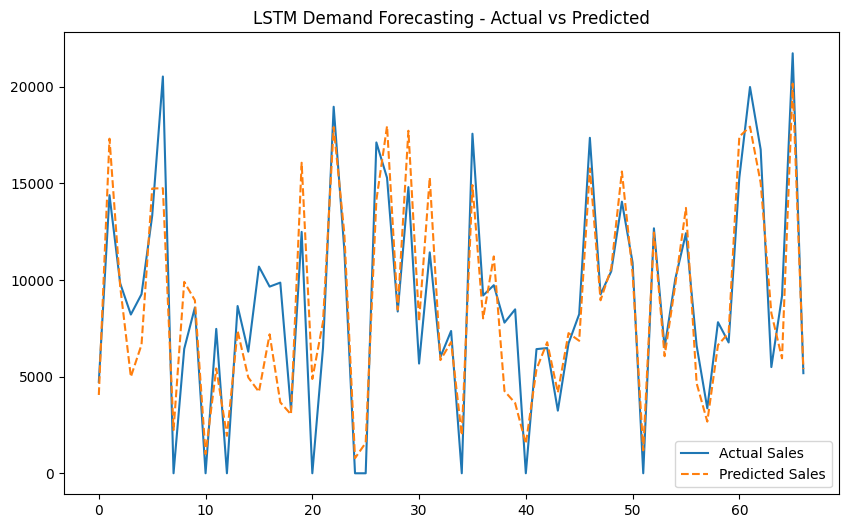

In [96]:
plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled, label='Actual Sales')
plt.plot(y_pred_rescaled, label='Predicted Sales', linestyle='dashed')
plt.legend()
plt.title("LSTM Demand Forecasting - Actual vs Predicted")
plt.show()

In [97]:
print("LSTM - MAE:", mean_absolute_error(y_test_rescaled, y_pred_rescaled))
print("LSTM - MSE:", mean_squared_error(y_test_rescaled, y_pred_rescaled))
print("LSTM - RMSE:", np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled)))
print("LSTM - R2 Score:", r2_score(y_test_rescaled, y_pred_rescaled))

LSTM - MAE: 1827.7520951359575
LSTM - MSE: 5528621.579178122
LSTM - RMSE: 2351.302102916195
LSTM - R2 Score: 0.8138368635764665


In [98]:
import tensorflow as tf

model.save("lstm_demand_forecasting.h5")

In [103]:
import tensorflow as tf

model = tf.keras.models.load_model("lstm_demand_forecasting.h5")

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

print("Model compiled successfully!")

Model compiled successfully!
